## delzinga.ipynb

In [514]:
import requests
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter

In [515]:
def read_office_script(url):
    # Read in the script from 
    r = requests.get(url)
    txt = r.text

    txt = re.sub('<[^<]+?>', '', txt) # Remove HTML commands
    txt = txt.replace('\n', '') # Remove new lines
    txt = txt.replace('&quot;', '') # Remove quotation
    txt = re.split('[A-Z][\w]+\:\s', txt)[1:] # Split on character indicators (e.g. Michael), drop everything before first line
    txt[-1] = re.split('[/\t]{2,}', txt[-1])[0] # The last line will contain the footer information. Scrape that off.
    lines = [re.sub('\[.+\]', '', t) for t in txt] # Remove actions from lines
    words = sum([re.split('\s+', line) for line in lines], []) # Break down into words
    words = [re.sub('[\., \/, \\, \,, \#, \!, \?, \$, \%, \^, \&, \*, \;, \:, \_]', '', w) for w in words] # Remove punctuation
    words = [w.lower() for w in words if w != ''] # Remove empty lines and put everything in lowercase
    
    c = Counter(words); N = len(c)
    freq_df = pd.DataFrame({'rel. frequency': [c/N for c in c.values()], 'word': c.keys()})
    
    return freq_df

In [516]:
def read_kims_script(url):
    # Read in the script from 
    r = requests.get(url)
    txt = r.text

    txt = re.sub('<[^<]+?>', '', txt) # Remove HTML commands
    txt = txt.replace('&quot;', '') # Remove quotation
    txt = re.split('[/\t, /\n]{2,}', txt)[29:-36] # Remove header and footer
    words = sum([re.split('\s+', t) for t in txt], []) # Break down into words
    words = [re.sub('[\., \/, \\, \,, \#, \!, \?, \$, \%, \^, \&, \*, \;, \:, \_]', '', w) for w in words] # Remove punctuation
    words = [w.lower() for w in words if w != ''] # Remove empty lines and put everything in lowercase

    c = Counter(words); N = len(c)
    freq_df = pd.DataFrame({'rel. frequency': [c/N for c in c.values()], 'word': c.keys()})

    return freq_df

In [517]:
office_olympics_url = 'https://transcripts.foreverdreaming.org/viewtopic.php?f=574&t=25310&sid=ffd6c6b775557d91bb3a93d335ea083a'
office_koi_url = 'https://transcripts.foreverdreaming.org/viewtopic.php?f=574&t=25408'
office_olympics_df = read_office_script(office_olympics_url)
office_koi_df = read_office_script(office_koi_url)

kim_parking_pass_url = 'https://transcripts.foreverdreaming.org/viewtopic.php?f=741&t=41626'
kim_df = read_kims_script(kim_parking_pass_url)

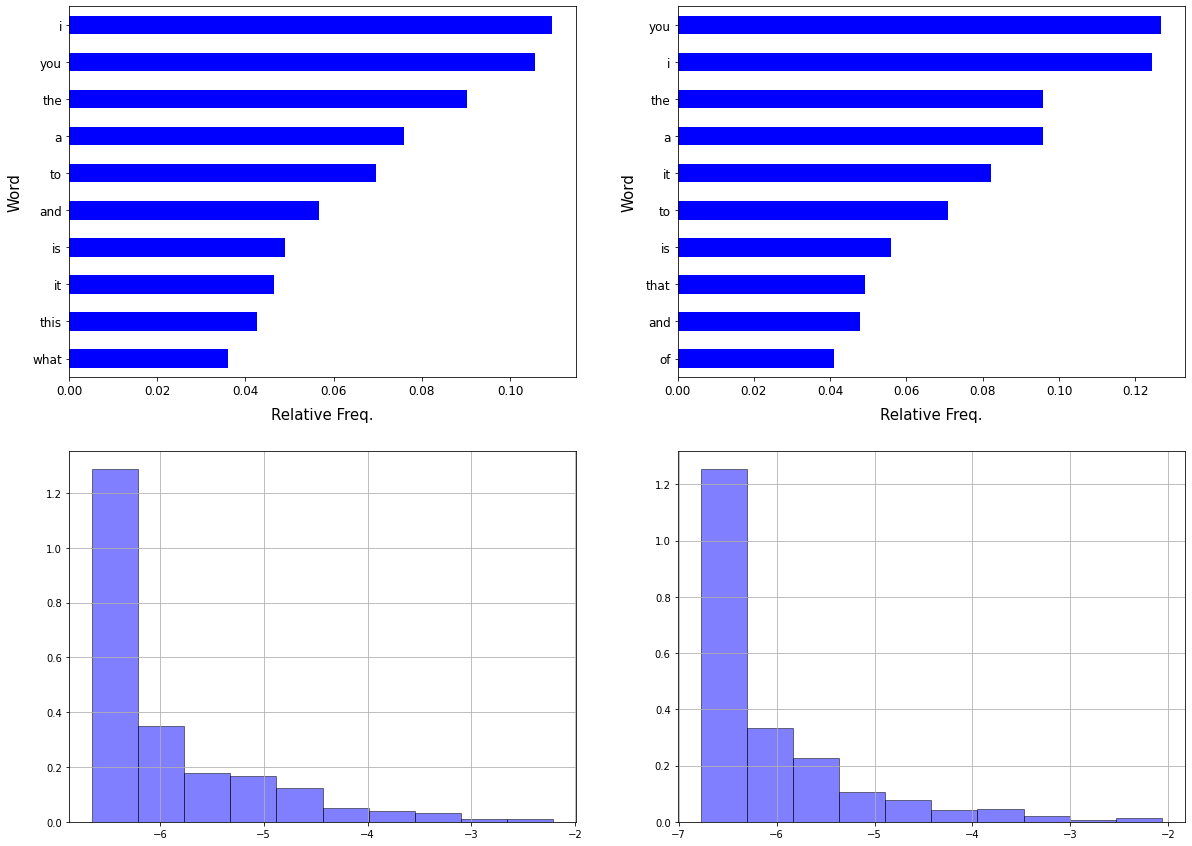

In [525]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

office_olympics_df.sort_values(by='rel. frequency', ascending=False)[:10].plot.barh(
    ax=axes[0, 0], x='word', y='rel. frequency', color='blue', legend=False)
np.log(office_olympics_df['rel. frequency']).hist(ax = axes[1, 0], color='blue', edgecolor='black', density=True, alpha=0.5)

axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Relative Freq.', fontsize=15, labelpad=10)
axes[0, 0].set_ylabel('Word', fontsize=15, labelpad=10);
axes[0, 0].tick_params(axis='both', labelsize=12)

office_koi_df.sort_values(by='rel. frequency', ascending=False)[:10].plot.barh(
    ax=axes[0, 1], x='word', y='rel. frequency', color='blue', legend=False)
np.log(office_koi_df['rel. frequency']).hist(ax = axes[1, 1], color='blue', edgecolor='black', density=True, alpha=0.5)

axes[0, 1].invert_yaxis()
axes[0, 1].set_xlabel('Relative Freq.', fontsize=15, labelpad=10)
axes[0, 1].set_ylabel('Word', fontsize=15, labelpad=10);
axes[0, 1].tick_params(axis='both', labelsize=12)